In [1]:
import numpy as np
import pandas as pd
import igraph as ig

import common

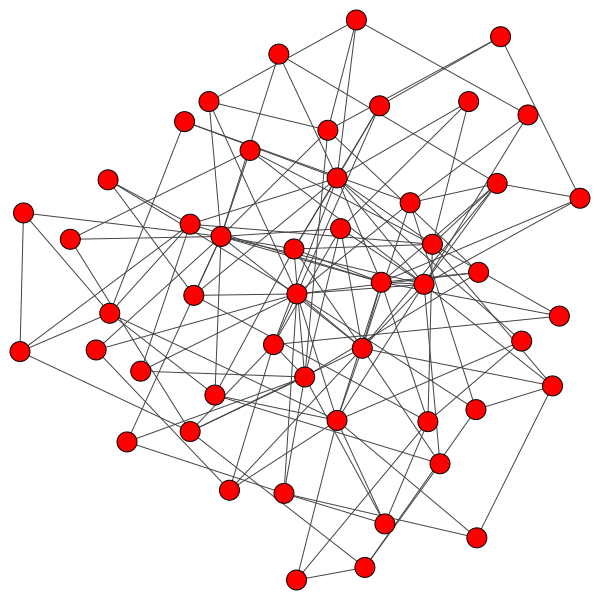

In [2]:
n_nodes = 50
g = ig.Graph.Barabasi(n_nodes, 3)
ig.plot(g)

In [3]:
def generate_graph(n_nodes, connectivity, w_min=0, w_max=100):
    # generate bidirectional connected graph
    # Barabasi does not assign weights though
    g = ig.Graph.Barabasi(n_nodes, connectivity) 

    # retrieve edgelist ans assign a new column with random weihts
    df = g.get_edge_dataframe() 
    df["weigth"] = np.random.randint(low=w_min, high=w_max, size=len(df))

    # create new graph from DataFrame and return it
    return ig.Graph.DataFrame(df)


def export_graph(g, filename):
    # retrieve edges including weigths
    df = g.get_edge_dataframe()

    # add Tags to leftmost columns
    df["tag"] = "E"
    df = df[["tag", "target", "source", "weigth"]] # reorder columns

    # create header by renaming columns names
    df = df.rename(columns={
        "tag" : "H", 
        "target": str(n_nodes),
        "source": str(len(df)),
        "weigth": "1"}
        )

    # write to file    
    df.to_csv(filename, sep=";", index=False)

def calculate_mst(g):
    return g.spanning_tree(weights=g.get_edge_dataframe()["weigth"])

In [6]:
g = generate_graph(20, 3)
export_graph(g, common.INPUT_DATA_DIR / "barabasi_50_3.csv")
export_graph(calculate_mst(g), common.INPUT_DATA_DIR / "barabasi_50_3_mst_gt.csv")
g.get_edge_dataframe()

,source,target,weigth
edge ID,,,
0,0,1,20
1,0,2,76
2,1,2,26
3,0,3,36
4,1,3,89
5,2,3,40
6,2,4,10
7,1,4,33
8,0,4,90
